## Predicting housing prices with linear regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
houses_df = pd.read_csv('housing_price_regression.csv')

### Dataset consists of 2051 homes, 5 features, and target

In [3]:
houses_df = houses_df[['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Garage Area', 
                       'Mas Vnr Area', 'SalePrice', 'target']]

In [4]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 7 columns):
Overall Qual    2051 non-null int64
Overall Cond    2051 non-null int64
Gr Liv Area     2051 non-null int64
Garage Area     2051 non-null float64
Mas Vnr Area    2051 non-null float64
SalePrice       2051 non-null int64
target          2051 non-null int64
dtypes: float64(2), int64(5)
memory usage: 112.3 KB


In [5]:
houses_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall Qual,2051.0,6.112140,1.426271,1.0,5.0,6.0,7.0,10.0
Overall Cond,2051.0,5.562165,1.104497,1.0,5.0,5.0,6.0,9.0
Gr Liv Area,2051.0,1499.330083,500.447829,334.0,1129.0,1444.0,1728.5,5642.0
Garage Area,2051.0,473.440761,216.135102,0.0,319.0,480.0,576.0,1418.0
Mas Vnr Area,2051.0,98.626524,174.324690,0.0,0.0,0.0,159.0,1600.0
SalePrice,2051.0,181469.701609,79258.659352,12789.0,129825.0,162500.0,214000.0,611657.0
target,2051.0,181469.701609,79258.659352,12789.0,129825.0,162500.0,214000.0,611657.0


### Target is price

In [6]:
houses_df['SalePrice'].head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: SalePrice, dtype: int64

In [7]:
y = houses_df['SalePrice']
X = houses_df.drop(columns=['SalePrice', 'target'])

### Train/test split

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [9]:
#predictions = {}
r2_train_mean = []
r2_test_mean = []


for test_size in np.linspace(.01, .99, 20):
    r2_train = []
    r2_test = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)

    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)

    lasso = LassoCV(cv = 5)
    lasso.fit(X_train_sc, y_train)

    r2_train.append(lasso.score(X_train_sc, y_train))
    r2_test.append(lasso.score(X_test_sc, y_test))
    
    r2_train_mean.append(np.mean(r2_train))
    r2_test_mean.append(np.mean(r2_test))
    #predictions[test_size] = lasso.predict(X_test)

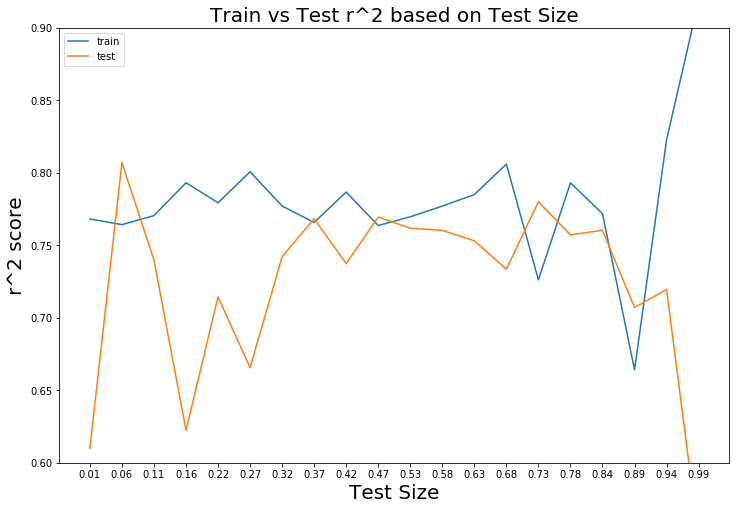

In [10]:
plt.figure(figsize = (12,8))
plt.title('Train vs Test r^2 based on Test Size', fontsize = 20)
plt.xticks(ticks = range(0,20), labels =  np.round(np.linspace(.01,.99,20), 2))
plt.xlabel('Test Size', fontsize = 20)
plt.ylabel('r^2 score', fontsize = 20)
plt.ylim([.6, .9])
plt.plot(r2_train_mean)
plt.plot(r2_test_mean)
plt.legend(labels = ['train', 'test']);

### Let's try with a smaller dataset

In [11]:
small_house_df = houses_df.sample(frac = .05)

In [12]:
small_house_df.shape

(103, 7)

In [13]:
y_small = houses_df['SalePrice']
X_small = houses_df.drop(columns=['SalePrice', 'target'])

In [14]:
#predictions = {}
r2_train_mean = []
r2_test_mean = []


for test_size in np.linspace(.01, .99, 20):
    r2_train = []
    r2_test = []
    
    X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size = test_size)

    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)

    lasso = LassoCV(cv = 5)
    lasso.fit(X_train_sc, y_train)

    r2_train.append(lasso.score(X_train_sc, y_train))
    r2_test.append(lasso.score(X_test_sc, y_test))
    
    r2_train_mean.append(np.mean(r2_train))
    r2_test_mean.append(np.mean(r2_test))
    #predictions[test_size] = lasso.predict(X_test)

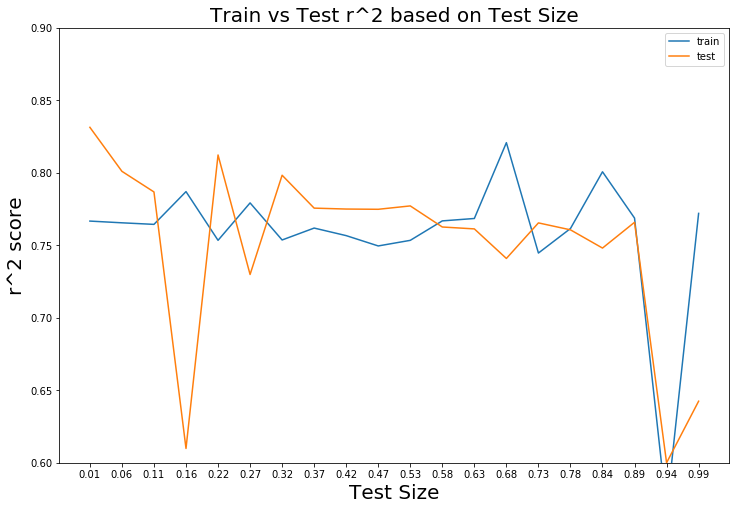

In [15]:
plt.figure(figsize = (12,8))
plt.title('Train vs Test r^2 based on Test Size', fontsize = 20)
plt.xticks(ticks = range(0,20), labels =  np.round(np.linspace(.01,.99,20), 2))
plt.xlabel('Test Size', fontsize = 20)
plt.ylabel('r^2 score', fontsize = 20)
plt.ylim([.6, .9])
plt.plot(r2_train_mean)
plt.plot(r2_test_mean)
plt.legend(labels = ['train', 'test']);

### Bring back dataset and use cross_validate

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .25)

In [18]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [19]:
lasso = Lasso()

In [21]:
all_accuracies = cross_val_score(estimator = lasso, X = X_train, y = y_train, cv = 10, n_jobs = -1) # n_jobs = -1 use all the cores in pc

In [22]:
all_accuracies

array([0.81089704, 0.78289057, 0.7340133 , 0.77349716, 0.76393027,
       0.80909877, 0.82207781, 0.70201183, 0.53832237, 0.7218034 ])

In [23]:
all_accuracies.mean()

0.7458542523023043

In [24]:
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [25]:
lasso.score(X_test, y_test)

0.801801115716231

In [26]:
from sklearn.model_selection import cross_validate

all_scores = cross_validate(estimator = lasso, X = X_train, y = y_train, 
                            cv = 10, n_jobs = -1, scoring = ['r2'])

all_scores

{'fit_time': array([0.00739694, 0.00474381, 0.00374603, 0.00517917, 0.00484085,
        0.00510406, 0.00575995, 0.00540519, 0.00361085, 0.00229096]),
 'score_time': array([0.00192809, 0.00178504, 0.00168705, 0.00218701, 0.00516033,
        0.00215411, 0.00172901, 0.00139689, 0.00112414, 0.00105119]),
 'test_r2': array([0.81089704, 0.78289057, 0.7340133 , 0.77349716, 0.76393027,
        0.80909877, 0.82207781, 0.70201183, 0.53832237, 0.7218034 ])}

### Gridsearch

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {
    'alpha': [.1, .5, 1, 2, 5, 10, 20, 100, 200, 1000, 5000],
    'tol': [.001, .01, .1, 1, 10],
    'max_iter' : [5, 10, 50, 100]
}

In [29]:
gs = GridSearchCV(estimator = lasso, param_grid = param_grid)

In [33]:
X_train_sc.shape

(1538, 5)

In [30]:
gs.fit(X_train_sc, y_train)

/Users/cslsh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/cslsh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 842076580048.8784, tolerance: 6574465870.086247
  positive)
/Users/cslsh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 849310602574.2511, tolerance: 6458867118.381154
  positive)
/Users/cslsh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning

/Users/cslsh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 766497790114.0914, tolerance: 6458867118.381154
  positive)
/Users/cslsh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 557205045409.563, tolerance: 6419510185.723164
  positive)
/Users/cslsh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 755615076253.7592, tolerance: 65744658700.86247
  positive)
/Users/cslsh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: Converg

/Users/cslsh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 793283815186.6761, tolerance: 6574465870.086247
  positive)
/Users/cslsh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 800100936318.1981, tolerance: 6458867118.381154
  positive)
/Users/cslsh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 625922664998.9855, tolerance: 6419510185.723164
  positive)
/Users/cslsh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: Conver

/Users/cslsh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8954978965.529785, tolerance: 6574465870.086247
  positive)
/Users/cslsh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10640660566.336426, tolerance: 6458867118.381154
  positive)
/Users/cslsh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25636488461.432373, tolerance: 6419510185.723164
  positive)
/Users/cslsh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: Conv

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.1, 0.5, 1, 2, 5, 10, 20, 100, 200, 1000,
                                   5000],
                         'max_iter': [5, 10, 50, 100],
                         'tol': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [34]:
gs.score(X_test_sc, y_test)

0.8005291508196002

In [35]:
gs.best_params_

{'alpha': 1000, 'max_iter': 5, 'tol': 0.1}

In [36]:
gs.cv_results_

{'mean_fit_time': array([0.00489759, 0.00196401, 0.00184298, 0.00123493, 0.00092745,
        0.00128675, 0.00131003, 0.00144529, 0.00102544, 0.00092991,
        0.0010004 , 0.00121021, 0.00093214, 0.00117628, 0.00101296,
        0.00142932, 0.00096226, 0.00092904, 0.00095336, 0.00092769,
        0.00156911, 0.00128063, 0.00144219, 0.00107265, 0.00103474,
        0.00399804, 0.00218852, 0.00135001, 0.00120195, 0.00106001,
        0.00123843, 0.00168864, 0.00145713, 0.00114361, 0.00090973,
        0.00097132, 0.00104674, 0.0010612 , 0.00089105, 0.0009524 ,
        0.00133681, 0.00128913, 0.00133697, 0.00114131, 0.00096854,
        0.00115967, 0.00129024, 0.00117477, 0.00086737, 0.00081833,
        0.00083065, 0.00099564, 0.000875  , 0.00133785, 0.00142797,
        0.00094032, 0.00083613, 0.00082898, 0.00103211, 0.00089033,
        0.00119734, 0.00147335, 0.00108926, 0.00085624, 0.00081658,
        0.00106502, 0.00131464, 0.00107678, 0.00115895, 0.00105675,
        0.00083192, 0.00086204,

In [37]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,param_tol,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004898,0.004423,0.001553,0.000618,0.1,5,0.001,"{'alpha': 0.1, 'max_iter': 5, 'tol': 0.001}",0.778488,0.792530,0.675073,0.748745,0.052358,51
1,0.001964,0.000053,0.001027,0.000332,0.1,5,0.01,"{'alpha': 0.1, 'max_iter': 5, 'tol': 0.01}",0.778488,0.792530,0.675073,0.748745,0.052358,51
2,0.001843,0.000219,0.001225,0.000049,0.1,5,0.1,"{'alpha': 0.1, 'max_iter': 5, 'tol': 0.1}",0.778488,0.792530,0.675073,0.748745,0.052358,51
3,0.001235,0.000271,0.000801,0.000170,0.1,5,1,"{'alpha': 0.1, 'max_iter': 5, 'tol': 1}",0.770240,0.778498,0.663694,0.737525,0.052265,173
4,0.000927,0.000019,0.000615,0.000007,0.1,5,10,"{'alpha': 0.1, 'max_iter': 5, 'tol': 10}",0.721836,0.719130,0.633107,0.691395,0.041191,217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0.000889,0.000052,0.000594,0.000008,5000,100,0.001,"{'alpha': 5000, 'max_iter': 100, 'tol': 0.001}",0.760158,0.784727,0.689962,0.744985,0.040143,130
216,0.000851,0.000016,0.000582,0.000002,5000,100,0.01,"{'alpha': 5000, 'max_iter': 100, 'tol': 0.01}",0.760433,0.784678,0.689816,0.745011,0.040229,127
217,0.000948,0.000193,0.000674,0.000069,5000,100,0.1,"{'alpha': 5000, 'max_iter': 100, 'tol': 0.1}",0.762573,0.786081,0.689092,0.745952,0.041299,121
218,0.000861,0.000042,0.000590,0.000006,5000,100,1,"{'alpha': 5000, 'max_iter': 100, 'tol': 1}",0.760207,0.783600,0.682075,0.742000,0.043396,133


### Pipelines

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA

In [39]:
scaler = StandardScaler()
pca = PCA()
knn = KNeighborsRegressor()

In [40]:
pipe = Pipeline(steps = [('scaler', scaler), ('pca', pca), ('knn', knn)])

In [41]:
param_grid = {
    'pca__n_components' : [2, 3, 4, 5],
    'knn__algorithm' : ['auto', 'ball_tree', 'brute', 'kd_tree'],
    'knn__n_neighbors' : [5, 9, 11, 13, 15, 17, 21, 25, 29],
    'knn__weights' : ['uniform', 'distance']
}

In [42]:
gs_pipe = GridSearchCV(pipe, param_grid, cv = 5, scoring='r2')

In [44]:
gs_pipe.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('knn',
                                        KNeighborsRegressor(algorithm='auto',
                                                            leaf_size=30,
                                                            me

In [45]:
gs_pipe.score(X_test, y_test)

0.8330194286604802

In [46]:
gs_pipe.best_params_

{'knn__algorithm': 'auto',
 'knn__n_neighbors': 17,
 'knn__weights': 'distance',
 'pca__n_components': 5}